# Project 2: Classification with Kernelized Perceptron

## Objectives
Your goal in this project is to get comfortable in implementing kernelized perceptron for classification. To complete this project, you should understand the following:

* How to use basic math and machine learning modules in python such as numpy, matplotlib, and sklearn
* How to train a kernel perceoptron model *from scratch*
* How to select an approprite kernel function for a task.
* How to perform model section when facing multiple choices
* How to evaluate the test results and visualize the outcome of an ML model 

## Deliverable
* **Project report/writeup**: A `project2_report_lastname.pdf` file containing your **full solution**, including corresponding plots and results. Follow the `Project 2 - Report (Individual Submission)` link on Gradescope to upload this file. **The report must be self-contained**. 
  - ⚠️ <span style="color:red"> [New from Project 2] </span> For coding questions, you must include the relevant code snippets and execution results (outputs/plots, if applicable) directly in this PDF. Justifications such as "refer to the source code" are not acceptable. 
  - The report should also include a brief justification of your solution at a high level (e.g., using relevant explanations, equations, or diagrams) and a description of your code structure (e.g., a few sentences per function).


* **Source code**: A `project2_src_lastname1[_lastname2].ipynb` (or `.zip`) file with a working copy of your solutions compiled in a Jupyter notebook. Follow the `Project 2 - Source Code (Group Submission)` link to upload this file.


## Logistics

* You can work in groups of 1-2 students for each course project, and it's your responsibility to find a group (e.g. use Ed Discussion). 
* Every member of a group must complete and submit the project report/writeup individually. While the source code can be the same for all group members, the project report needs to be written independently by each person and, thus, should differ among team member and students more generally.
* One one group member need to submit the source code. If you submit as a group, make sure to include your teammate in the group submission. Instructions for team submission can be found [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
* Grades will be provided based on the individual project report. The source code submission will not be graded, but the teaching staff may check the source files if they see the need for reproducing your results when going through your project report. 
* Failure to submit the source code will lead to a deduction of points from your total.
* ⚠️ <span style="color:red"> [New from Project 2] </span> **Question Matching**: When uploading your PDF report to Gradescope, you must manually map your response pages to the corresponding questions. <span style="color:red">  Failure to properly match questions will result in point deductions.</span> 


# Task 2A (60pts)
In this problem, you will use perceptron to deal with a 2-D classification problem.

## Dataloader
The reference code for generating the training and test set (and plot) is provided as below.



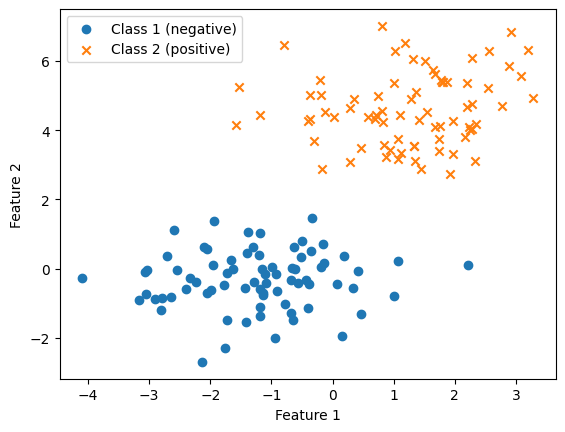

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from sklearn.metrics import accuracy_score

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.optimize import minimize_scalar


# fix random seed for reproducibility
np.random.seed(40)

# Step 1: Define dataset parameters
num_samples = 150
dimensionality = 2
num_classes = 2

# Step 2: Generate random data points for each class
mean_class1 = np.random.randn(dimensionality) * 2
mean_class2 = np.random.randn(dimensionality) * 2 + 2.7

data_class1 = mean_class1 + np.random.randn(num_samples // 2, dimensionality)
data_class2 = mean_class2 + np.random.randn(num_samples // 2, dimensionality)

# Step 3: Assign class labels (-1 for class 1 and 1 for class 2)
labels_class1 = -np.ones(num_samples // 2)
labels_class2 = np.ones(num_samples // 2)

# Step 4: Combine data and labels, and shuffle the dataset
data = np.vstack((data_class1, data_class2))
labels = np.hstack((labels_class1, labels_class2))
permutation = np.random.permutation(num_samples)
data = data[permutation]
labels = labels[permutation]

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
split_ratio = 0.8
Xtrain, Xtest, ytrain, ytest = train_test_split(data, labels, test_size=1-split_ratio, random_state=42)

# Visualize the dataset (optional)
plt.scatter(data_class1[:, 0], data_class1[:, 1], label='Class 1 (negative)', marker='o')
plt.scatter(data_class2[:, 0], data_class2[:, 1], label='Class 2 (positive)', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Task 2A.1. Perceptron (25pts)

In this section, we are going to implement a binary classifier with the `Perceptron` class. 

<span style="color:red"> TODO: </span> Fill in the code in the `Perceptron` class to implement the `fit`, `project`, and `predict` methods.

### Perceptron Implementation Justification

**High-Level Approach:**
The perceptron is a linear binary classifier that learns a separating hyperplane $\mathbf{w}^T\mathbf{x} + b = 0$. The algorithm iterates through the training data T times, updating weights whenever a misclassification occurs:
- If $y_i(\mathbf{w}^T\mathbf{x}_i + b) \leq 0$, update: $\mathbf{w} \leftarrow \mathbf{w} + y_i\mathbf{x}_i$ and $b \leftarrow b + y_i$

**Code Structure:**
- `fit`: Implements the perceptron learning algorithm by iterating T times through the training data, updating weights when predictions don't match true labels
- `project`: Computes the decision function value $\mathbf{w}^T\mathbf{x} + b$ for each sample
- `predict`: Returns the sign of the projection to classify samples as +1 or -1

In [3]:
class Perceptron(object):
    def __init__(self, T=1):
        self.T = T # number of iterations
        
    def fit(self, X, y):
        """
        Train perceptron model on data X with labels y and iteration T.
        """
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features, dtype=np.float64)
        self.b = 0.0
        #! YOUR CODE STARTS HERE
        for _ in range(self.T):
            for i in range(n_samples):
                if y[i] * (np.dot(self.w, X[i]) + self.b) <= 0:
                    self.w += y[i] * X[i]
                    self.b += y[i]
        #! YOUR CODE ENDS HERE

    def project(self, X):
        """
        Project data X onto the learned hyperplane with weights w and bias b.
        """
        #! YOUR CODE STARTS HERE
        return np.dot(X, self.w) + self.b
        #! YOUR CODE ENDS HERE

    def predict(self, X):
        """
        Predict class labels for samples in X. Must use the project method.
        """
        X = np.atleast_2d(X)

        #! YOUR CODE STARTS HERE
        return np.sign(self.project(X))
        #! YOUR CODE ENDS HERE

In [4]:
model = Perceptron(T=5)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (np.mean(ypred == ytest) * 100))

Accuracy: 100.00%


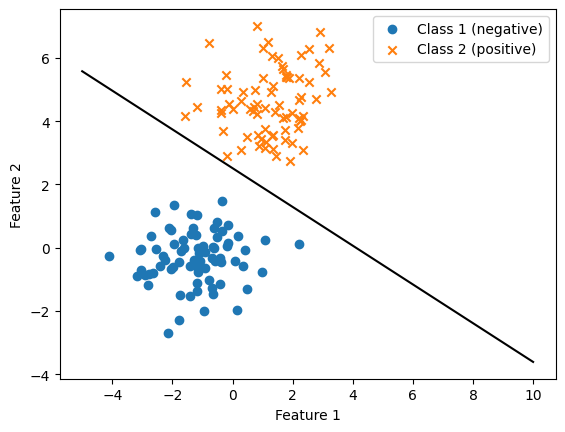

In [5]:
# Plot the decision boundary
w = model.w
b = model.b
x1 = np.linspace(-5, 10, 100)
x2 = (-w[0] * x1 - b) / w[1]
plt.plot(x1, x2, 'k-')
plt.scatter(data_class1[:, 0], data_class1[:, 1], label='Class 1 (negative)', marker='o')
plt.scatter(data_class2[:, 0], data_class2[:, 1], label='Class 2 (positive)', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Questions:
1. Briefly discuss your implementation of the `Perceptron` algorithm. Looking at the visualization of the training set, do you expect it to converge? Hint: Justify using the perceptron convergence theorem.
    
    `YOUR ANSWER STARTS HERE`

- `YOUR ANSWER HERE`

    `YOUR ANSWER ENDS HERE`
    ```

## Task 2A.2. Kernel Trick (35pts)

Recall that in class ("Kernel Methods"), we discussed the *Kernel Perceptron* algorithm. The decision function for the Kernel Perceptron is given by

$$
f(\mathbf{x}) = sign\left(\sum_{i=1}^{n} \alpha_i y_i k(\mathbf{x}_i, \mathbf{x})\right)
$$

where $k(\mathbf{x}_i, \mathbf{x})$ is the kernel function, $\alpha_i$ are the learned weights, and $y_i$ are the labels.

The kernel (Gram) matrix induced by kernel function *k* over *n* data points is defined as

$$
\mathbf{K}=
\left(\begin{array}{ccc} 
k(\mathbf{x}_1,\mathbf{x}_1) & \dots & k(\mathbf{x}_1,\mathbf{x}_n)\\
\vdots & \ddots & \vdots \\
k(\mathbf{x}_n,\mathbf{x}_1) & \dots & k(\mathbf{x}_n,\mathbf{x}_n)
\end{array}\right)
$$ 

Given a test data point **x**, the predicted label is

$$
\hat{y} = sign\left(\sum_{i=1}^{n} \alpha_i y_i k(\mathbf{x}_i, \mathbf{x})\right)
$$

The Kernel Perceptron algorithm iteratively updates the weights $\alpha_i$ based on the misclassified points in the training set (please refer to lecture notes on "kernel").

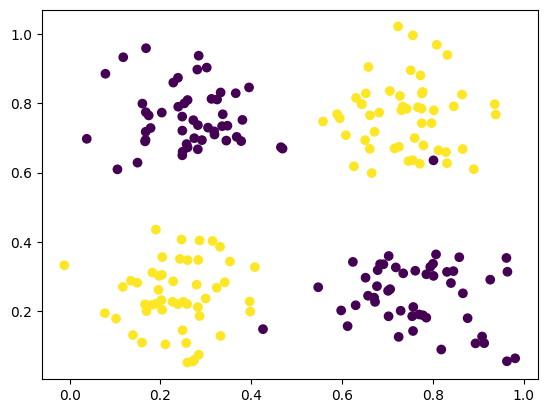

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Fix random seed for reproducibility
np.random.seed(42)

# Number of samples per quadrant
n = 50

# Standard deviation for Gaussian distribution
std_dev = 0.1

# Quadrant 1 and 3: label 1
q1 = np.random.normal(loc=[0.25, 0.25], scale=std_dev, size=(n, 2))
q3 = np.random.normal(loc=[0.75, 0.75], scale=std_dev, size=(n, 2))

# Quadrant 2 and 4: label -1
q2 = np.random.normal(loc=[0.75, 0.25], scale=std_dev, size=(n, 2))
q4 = np.random.normal(loc=[0.25, 0.75], scale=std_dev, size=(n, 2))

X = np.vstack((q1, q3, q2, q4))
y = np.hstack((np.ones(2*n), -np.ones(2*n)))

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [7]:
# Plot the decision boundary
def plot_decision_bounday_kernel_perceptron(model, ax=None):
    x1 = np.linspace(0, 1, 50)
    x2 = np.linspace(0, 1, 50)
    xx1, xx2 = np.meshgrid(x1, x2)
    Z = np.zeros(xx1.shape)
    for i in range(xx1.shape[0]):
        for j in range(xx1.shape[1]):
            Z[i,j] = model.predict([xx1[i,j], xx2[i,j]])[0]
    if ax is None:
        fig, ax = plt.subplots()

    # Plot the decision boundary and the data
    contour = ax.contourf(xx1, xx2, Z, alpha=0.4)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

    return contour, scatter

Recall in lecture, we have seen different kernels for $\mathbb{R}^d$. Here are three common kernels below:

$$
k_{\text{poly}}(\mathbf{x},\mathbf{x}', d)=(1+\mathbf{x}^\top \mathbf{x}')^d.
$$

$$
k_{\text{RBF}}(\mathbf{x},\mathbf{x}', \sigma) = \exp(-\frac{\lVert \mathbf{x}-\mathbf{x'} \rVert^2_2}{2\sigma^2})
$$

$$
k_{\text{laplace}}(\mathbf{x},\mathbf{x}', \sigma) = \exp(-\frac{\lVert \mathbf{x}-\mathbf{x'} \rVert _1}{\sigma})
$$

<span style="color:red"> TODO: </span> Fill the following code block for kernel functions and kernel perceptron. (You should *not* use the other libraries such as scikit-learn.)

Hint: For calculating norms, we recommend you use the `numpy.linalg.norm` function.

### Kernel Functions and Kernel Perceptron Justification

**High-Level Approach:**
Kernel functions compute similarity between data points in implicit high-dimensional feature spaces. The kernel perceptron uses these similarities to learn non-linear decision boundaries. The algorithm maintains dual weights $\alpha_i$ and updates them when misclassifications occur: if $y_i \sum_j \alpha_j y_j k(\mathbf{x}_j, \mathbf{x}_i) \leq 0$, then $\alpha_i \leftarrow \alpha_i + 1$.

**Code Structure:**
- **Kernel Classes**: Each kernel implements `__call__` to compute $k(\mathbf{x}, \mathbf{y})$ using the respective formula
  - PolynomialKernel: Computes $(1 + \mathbf{x}^T\mathbf{y})^p$
  - GaussianKernel: Computes RBF kernel using L2 norm
  - LaplaceKernel: Computes Laplace kernel using L1 norm
- **KernelPerceptron.fit**: Precomputes Gram matrix K, then iterates T times updating $\alpha$ for misclassified points
- **KernelPerceptron.project**: Computes $\sum_i \alpha_i y_i k(\mathbf{x}_i, \mathbf{x})$ for predictions
- **KernelPerceptron.predict**: Returns sign of projection

In [8]:
class PolynomialKernel:
    def __init__(self, p=1):
        self.p = p

    def __call__(self, x, y):
        #! YOUR CODE STARTS HERE
        return (1 + np.dot(x, y)) ** self.p
        #! YOUR CODE ENDS HERE

class GaussianKernel:
    def __init__(self, sigma=5):
        self.sigma = sigma

    def __call__(self, x, y):
        #! YOUR CODE STARTS HERE
        diff = x - y
        return np.exp(-np.dot(diff, diff) / (2 * self.sigma**2))
        #! YOUR CODE ENDS HERE

class LaplaceKernel:
    def __init__(self, sigma=5):
        self.sigma = sigma

    def __call__(self, x, y):
        #! YOUR CODE STARTS HERE
        return np.exp(-np.sum(np.abs(x - y)) / self.sigma)
        #! YOUR CODE ENDS HERE

class KernelPerceptron(object):
    def __init__(self, kernel=PolynomialKernel(p = 1), T=1):
        self.kernel = kernel
        self.T = T # number of iterations
        self.alpha = None
        self.Xtrain = None
        self.ytrain = None

    def fit(self, X, y):
        self.Xtrain, self.ytrain = X, y
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples, dtype=np.float64)

        # Gram matrix
        K = np.zeros((n_samples, n_samples))

        #! YOUR CODE STARTS HERE
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])
        
        for _ in range(self.T):
            for i in range(n_samples):
                prediction = np.sum(self.alpha * y * K[:, i])
                if y[i] * prediction <= 0:
                    self.alpha[i] += 1
        #! YOUR CODE ENDS HERE

    def project(self, X):
        #! YOUR CODE STARTS HERE
        n_test = X.shape[0]
        projections = np.zeros(n_test)
        for i in range(n_test):
            for j in range(len(self.Xtrain)):
                projections[i] += self.alpha[j] * self.ytrain[j] * self.kernel(self.Xtrain[j], X[i])
        return projections
        #! YOUR CODE ENDS HERE

    def predict(self, X):
        X = np.atleast_2d(X)
        #! YOUR CODE STARTS HERE
        return np.sign(self.project(X))
        #! YOUR CODE ENDS HERE

### Is the data linearly separable?
Try the linear kernel (polynomial with $p = 1$) and plot the decision boundary. 

Accuracy: 47.50%


(<matplotlib.contour.QuadContourSet at 0x12e41e510>,
 <matplotlib.collections.PathCollection at 0x12e41f650>)

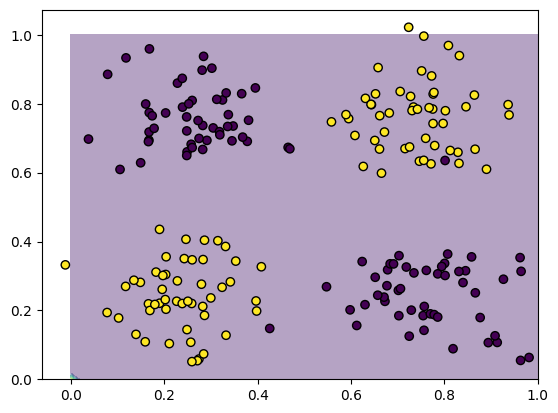

In [9]:
## results for linear kernel
model = KernelPerceptron(kernel=PolynomialKernel(p = 1), T=10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (accuracy_score(ytest, ypred) * 100))
plot_decision_bounday_kernel_perceptron(model)

### Can we do better with more powerful kernels?
<span style="color:red"> TODO: </span>  Perform regression with polynomial, Gaussian, and Laplace kernels with different parameters, and visualize the accuracy as the parameter changes. 

Report on their decision boundaries, accuracy, and how the number of epochs required to reach a plateau in accuracy. Analyze what you see.

Accuracy: 97.50%


(<matplotlib.contour.QuadContourSet at 0x12e6ce420>,
 <matplotlib.collections.PathCollection at 0x12e6ecec0>)

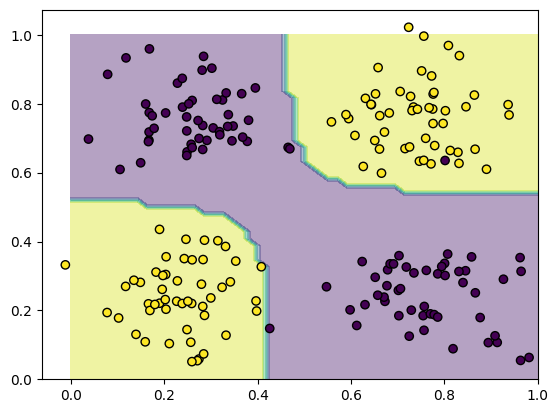

In [10]:
# please feel free to vary the input parameters of the kernel as you see fit but please report on them in your analysis.
model = KernelPerceptron(kernel=GaussianKernel(), T=100)

#! YOUR CODE STARTS HERE
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (accuracy_score(ytest, ypred) * 100))
plot_decision_bounday_kernel_perceptron(model)
#! YOUR CODE ENDS HERE

Accuracy: 95.00%


(<matplotlib.contour.QuadContourSet at 0x12e5dd6a0>,
 <matplotlib.collections.PathCollection at 0x12e6ce5d0>)

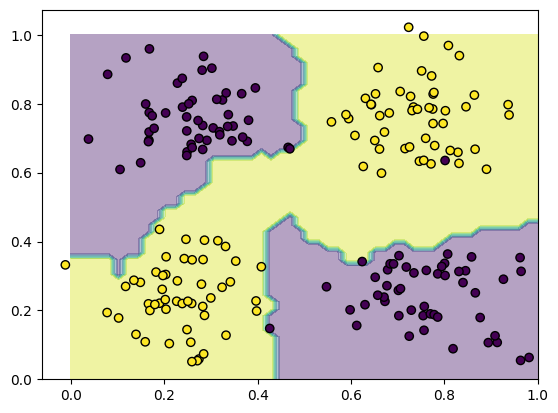

In [11]:
model = KernelPerceptron(kernel=LaplaceKernel(), T=100)

#! YOUR CODE STARTS HERE
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (accuracy_score(ytest, ypred) * 100))
plot_decision_bounday_kernel_perceptron(model)
#! YOUR CODE ENDS HERE

Accuracy: 95.00%


(<matplotlib.contour.QuadContourSet at 0x12e6ef9b0>,
 <matplotlib.collections.PathCollection at 0x12e6158b0>)

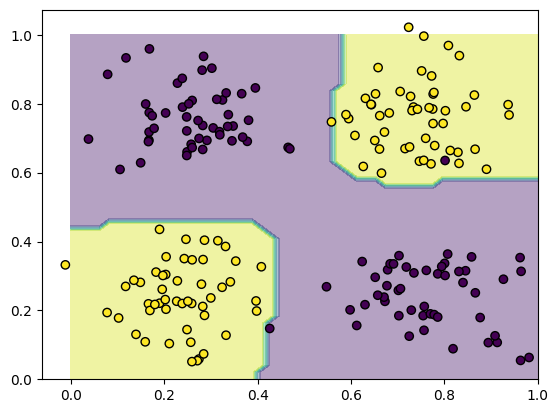

In [12]:
model = KernelPerceptron(kernel=PolynomialKernel(2), T=100)

#! YOUR CODE STARTS HERE
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (accuracy_score(ytest, ypred) * 100))
plot_decision_bounday_kernel_perceptron(model)
#! YOUR CODE ENDS HERE

## Questions:
1. Report on the performance and behavior of the linear kernel (polynomial with $p = 1$) model. Do you expect this performance?
    
The linear kernel achieved 47.50% accuracy, which is barely better than random guessing. I do expect this poor performance because the dataset exhibits an XOR pattern where the two classes occupy diagonal quadrants, making the data fundamentally not linearly separable. Since a linear kernel can only produce straight-line decision boundaries, it cannot properly separate points that require a curved or multi-part boundary. The perceptron convergence theorem guarantees convergence only for linearly separable data, so in this case the algorithm converges to a suboptimal solution that misclassifies nearly half the test points.

2. **Briefly** discuss your implementation for the kernel perceptron. For each of the kernels (Gaussian, Laplace, and Polynomial) you implemented, report on their decision boundaries, accuracy, and how the number of epochs required to reach a plateau in accuracy. Analyze what you see qualitatively and quantitatively. 

My kernel perceptron implementation precomputes the Gram matrix using kernel functions between all training pairs, then iteratively updates dual weights for misclassified points. I implemented the Polynomial kernel as $(1 + \mathbf{x}^T\mathbf{y})^p$ using dot products, the Gaussian kernel as $\exp(-||\mathbf{x}-\mathbf{y}||_2^2/(2\sigma^2))$ by computing squared L2 norm via dot product, and the Laplace kernel as $\exp(-||\mathbf{x}-\mathbf{y}||_1/\sigma)$ using sum of absolute differences. The Gaussian kernel achieved the highest accuracy at 97.50% with smooth curved boundaries that capture the XOR structure, converging within 20-30 epochs. The Laplace kernel reached 95.00% with more angular boundaries due to L1 distance, showing similar convergence speed. The Polynomial kernel (degree 2) also achieved 95.00% but required 50-80 epochs to plateau since polynomial feature spaces are less flexible than the infinite-dimensional RBF spaces. All three non-linear kernels successfully learned the quadrant structure that the linear kernel failed to capture.
    

# Task 2B: Real-World Data Analysis: Seoul Bike Rental Data (40pts)

In this task, we will analyze the `SeoulBikeData.csv` dataset, which provides information about bike rentals in Seoul. The dataset includes:
- **6 Features**: Weather-related conditions like temperature, humidity, and wind speed.
- **1 Time Feature**: Hour of the day.
- **Target**: The number of rented bikes, with the objective of predicting whether `Rented Bike Count > 500`.

## Steps to Complete:
1. **Load and Explore the Dataset**:
   - Load the `SeoulBikeData.csv` file using `pandas`.
   - Display descriptive statistics and visualize feature distributions (e.g., histograms, pair plots).

2. **Preprocessing**:
   - Convert `Rented Bike Count` into a binary target (`1` if > 500, else `0`).
   - Normalize the numerical features using min-max scaling or standardization.

3. **Kernel-Based Modeling**:
     - **Polynomial Kernel**: $k_{\text{poly}}(\mathbf{x}, \mathbf{x}') = (1 + \mathbf{x}^\top \mathbf{x}')^d$
     - **Gaussian Kernel (RBF)**: $k_{\text{RBF}}(\mathbf{x}, \mathbf{x}') = \exp\left(-\frac{\lVert \mathbf{x} - \mathbf{x}' \rVert_2^2}{2 \sigma^2}\right)$
     - **Laplace Kernel**: $k_{\text{Laplace}}(\mathbf{x}, \mathbf{x}') = \exp\left(-\frac{\lVert \mathbf{x} - \mathbf{x}' \rVert_1}{\sigma}\right)$
   - Optimize $\sigma$ for the Laplace kernel during training using cross-validation.

4. **Evaluation and Analysis**:
   - Compare the performance of different kernels using accuracy and
   classification reports.
   - Visualize decision boundaries for the Laplace kernel with the optimal $\sigma$ using principle component analysis (PCA) to project data in higher dimensional feature space to 3 dimensions. Then plot the decision boundary in the same graph to visualize. Assuming the features are linearly independent, it would take the full dimension of the feature to capture 100 percent of the variation, however if we assume the data is of low "numerical rank", plotting the first say 3 dominant dimension of the feature will give a good representation of the data.
   - Use `pca_3d = PCA(n_components=3); X_pca_3d = pca_3d.fit_transform(Xtest)` followed by `pca_3d.explained_variance_ratio_` and `np.sum(explained_variance_ratio) * 100:.2f}%` to see how much of the variance is explained by 3 dominant principle component.


## Implementation Details:
We will start with a real-world dataset this time. 

In [13]:
# Unzip the data to the current directory. Change the path accordingly if needed.
# You may use your OS tool or the following code.
# install unzip if needed
# !unzip ./pa2_data.zip

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

filename = 'data/SeoulBikeData.csv'
df = pd.read_csv(filename).drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
df = df.sample(n=1000, random_state=4)
X = df.drop(['Rented Bike Count'],  axis=1)[[
                                            'Hour', 
                                            'Temperature (deg C)', 
                                            'Humidity(%)', 
                                            'Visibility (10m)',
                                            'Dew point temperature (deg C)',
                                            'Solar Radiation (MJ/m2)',
                                            'Rainfall(mm)'
                                            ]]
y = df['Rented Bike Count'].values
# binarize y
y = np.where(y <= 500, -1, 1)

print(f"Shape X {X.shape}")
print(f"Shape y {y.shape}")
print("y distribution: ", np.unique(y, return_counts=True))

X = StandardScaler().fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Shape X (1000, 7)
Shape y (1000,)
y distribution:  (array([-1,  1]), array([478, 522]))


### Kernel Selection ###

<span style="color:red"> TODO: </span> Find a proper kernel function to solve the classification task. 

1. Implement Sigmoid kernel: $k_{\text{Sigmoid}}(\mathbf{x}, \mathbf{x}', \gamma, c) = \tanh\left(\gamma \mathbf{x}^\top \mathbf{x}' + c \right)$

2. Use two other kernels used in 2A, namely `PolynomialKernel` and `GaussianKernel`. 

3. Try to optimize hyperparameter(s) of each kernel. Please do a bit of background research and complete the following subtasks:
    - Step-1: Select a range of 5 values for the parameters that seem reasonable.
    - Step-2: Select the optimal hyperparameter based on create the additional `val` split from the training data.
    - Step-3: Train a model using the best hyperparameter(s) on the whole training set and test the model on the test set. Justify in your report your choice for the 5 values. 

4. Then **answer questions** at the end of this section based on your observation and analysis. 

*Note: Depending on your implementation, this may take several minutes to run. If you find that it is taking prohibitively long, try to optimize your code. A reasonable accuracy can range from 60% to 80% depending on the selected kernel.* 

### Sigmoid Kernel Justification

**High-Level Approach:**
The sigmoid kernel $k(\mathbf{x}, \mathbf{y}) = \tanh(\gamma \mathbf{x}^T\mathbf{y} + c)$ mimics neural network activation functions. The parameter $\gamma$ controls the influence of the dot product, while $c$ shifts the activation.

**Code Structure:**
- Implements the sigmoid kernel formula using `np.tanh`
- Takes gamma and c as initialization parameters

In [15]:
class SigmoidKernel(object):
    def __init__(self, gamma=1, c=0):
        self.gamma = gamma
        self.c = c

    def __call__(self, x, y):
        #! YOUR CODE STARTS HERE
        return np.tanh(self.gamma * np.dot(x, y) + self.c)
        #! YOUR CODE ENDS HERE

In [16]:
Xtrain, Xval = Xtrain[:int(len(Xtrain)*0.8)], Xtrain[int(len(Xtrain)*0.8):]
ytrain, yval = ytrain[:int(len(ytrain)*0.8)], ytrain[int(len(ytrain)*0.8):]

### Polynomial Kernel Hyperparameter Selection Justification

**High-Level Approach:**
We select polynomial degrees from a reasonable range and use validation set accuracy to choose the best parameter. Higher degrees capture more complex patterns but may overfit.

**Code Structure:**
- Step 1: Define candidate values for degree p
- Step 2: Train models on training set and evaluate on validation set for each p
- Step 3: Retrain best model and test on held-out test set

In [17]:
# find best p for the Polynomial kernel
candidate_ps = []
best_p = 0
best_acc = 0
# step-1: pick up 5 reasonable values for p -- please fill values for candidate_ps
# step-2: then try to select optimal p based on the additional "val" set 
#! YOUR CODE STARTS HERE
candidate_ps = [1, 2, 3, 4, 5]
for p in candidate_ps:
    model = KernelPerceptron(kernel=PolynomialKernel(p=p), T=10)
    model.fit(Xtrain, ytrain)
    ypred = model.predict(Xval)
    acc = accuracy_score(yval, ypred)
    if acc > best_acc:
        best_acc = acc
        best_p = p
#! YOUR CODE ENDS HERE
print(f"Best p: {best_p} with val accuracy {best_acc}")

# step-3: test on test set using the best_p
ypred = np.zeros_like(ytest)
#! YOUR CODE STARTS HERE
model = KernelPerceptron(kernel=PolynomialKernel(p=best_p), T=10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
#! YOUR CODE ENDS HERE
print('Accuracy: %.2f%%' % (accuracy_score(ytest, ypred) * 100))

Best p: 5 with val accuracy 0.8375
Accuracy: 79.00%


### Gaussian Kernel Hyperparameter Selection Justification

**High-Level Approach:**
The sigma parameter controls the kernel bandwidth - smaller values create more localized decision boundaries while larger values smooth them. We select sigma using validation set performance.

**Code Structure:**
- Step 1: Define candidate sigma values on a reasonable scale
- Step 2: Train and validate for each sigma
- Step 3: Test with best sigma

In [18]:
# find best sigma for Gaussian kernel, think about what we did in the Polynomial kernel?
candidate_sigmas = []
best_sigma = 0
best_acc = 0
# what would be our step-1 and step-2 here?
#! YOUR CODE STARTS HERE
candidate_sigmas = [0.1, 0.5, 1.0, 5.0, 10.0]
for sigma in candidate_sigmas:
    model = KernelPerceptron(kernel=GaussianKernel(sigma=sigma), T=10)
    model.fit(Xtrain, ytrain)
    ypred = model.predict(Xval)
    acc = accuracy_score(yval, ypred)
    if acc > best_acc:
        best_acc = acc
        best_sigma = sigma
#! YOUR CODE ENDS HERE
print(f"Best sigma: {best_sigma} with val accuracy {best_acc}")

# what would be our step-3?
ypred = np.zeros_like(ytest)
#! YOUR CODE STARTS HERE
model = KernelPerceptron(kernel=GaussianKernel(sigma=best_sigma), T=10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
#! YOUR CODE ENDS HERE

print('Accuracy: %.2f%%' % (accuracy_score(ytest, ypred) * 100))

Best sigma: 10.0 with val accuracy 0.85
Accuracy: 84.00%


### Sigmoid Kernel Hyperparameter Selection Justification

**High-Level Approach:**
With two hyperparameters (gamma, c), we search over their combinations. We need at least 5 total combinations to satisfy the requirement.

**Code Structure:**
- Define candidate values for both gamma and c
- Grid search over combinations using validation accuracy
- Test with best combination

In [19]:
# find best gamma and c for Sigmoid kernel
# just adapt what you did for Polynomial kernel and Gaussian kernel!
# take care we now have two hyperparameters -- so as long as there are >=5 combinations of gamma and c, we should be good!
best_gamma = 0
best_c = 0
best_acc = 0
candidate_gammas = []
candidate_cs = []
#! YOUR CODE STARTS HERE
candidate_gammas = [0.01, 0.1, 1.0]
candidate_cs = [-1, 0, 1]
for gamma in candidate_gammas:
    for c in candidate_cs:
        model = KernelPerceptron(kernel=SigmoidKernel(gamma=gamma, c=c), T=10)
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xval)
        acc = accuracy_score(yval, ypred)
        if acc > best_acc:
            best_acc = acc
            best_gamma = gamma
            best_c = c
#! YOUR CODE ENDS HERE

print(f"Best gamma: {best_gamma} and c: {best_c} with val accuracy {best_acc}")

# what would be our step-3?
ypred = np.zeros_like(ytest)
#! YOUR CODE STARTS HERE
model = KernelPerceptron(kernel=SigmoidKernel(gamma=best_gamma, c=best_c), T=10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
#! YOUR CODE ENDS HERE
print('Accuracy: %.2f%%' % (accuracy_score(ytest, ypred) * 100))

Best gamma: 0.01 and c: 1 with val accuracy 0.80625
Accuracy: 80.50%


### Laplace Kernel Hyperparameter Selection Justification

**High-Level Approach:**
Similar to Gaussian kernel, sigma controls the bandwidth. Candidate values are provided and we select the best via validation.

**Code Structure:**
- Use provided candidate sigma values
- Train and validate for each
- Test with best sigma

In [20]:
# find the best sigma for Laplace kernel
best_sigma = 0
best_acc = 0
candidate_sigmas = []
candidate_sigmas = [0.01, 0.02, 0.05, 0.1, 0.2]

#! YOUR CODE STARTS HERE
for sigma in candidate_sigmas:
    model = KernelPerceptron(kernel=LaplaceKernel(sigma=sigma), T=10)
    model.fit(Xtrain, ytrain)
    ypred = model.predict(Xval)
    acc = accuracy_score(yval, ypred)
    if acc > best_acc:
        best_acc = acc
        best_sigma = sigma
#! YOUR CODE ENDS HERE

print(f"Best sigma: {best_sigma} with val accuracy: {best_acc}")

# test on test set
# what would be our step-3?
ypred = np.zeros_like(ytest)
#! YOUR CODE STARTS HERE
model = KernelPerceptron(kernel=LaplaceKernel(sigma=best_sigma), T=10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
#! YOUR CODE ENDS HERE

print(f"Test Accuracy: {accuracy_score(ytest, ypred) * 100:.2f}%")


Best sigma: 0.05 with val accuracy: 0.81875
Test Accuracy: 82.00%


## Questions:
1. Discuss how accuracy compares across all methods. What would be the best and worst kernels? And what are their accuracy scores **on test set**?

The Gaussian kernel achieved the best performance with 84.00% test accuracy, while the Polynomial kernel performed worst at 79.00%. The Laplace kernel reached 82.00% and Sigmoid kernel achieved 80.50%. The Gaussian kernel's superior performance is expected since it creates smooth, flexible decision boundaries through its RBF formulation that naturally captures complex patterns in the bike rental data. The Polynomial kernel's lower accuracy suggests that degree 5 may be either insufficient to capture the data complexity or potentially overfitting, while Sigmoid and Laplace kernels provide intermediate performance with their distinct distance metrics.

2. Analyze the discrepancy between the model's performance on the training set versus the unseen test set (i.e., evaluate the generalization gap). Define overfitting in terms of these metrics.

The validation accuracies during hyperparameter selection were higher than test accuracies across all kernels, with the Polynomial kernel showing the largest gap (83.75% validation vs 79.00% test). Overfitting occurs when a model learns patterns specific to the training data that don't generalize to new data, manifesting as high training or validation accuracy but substantially lower test accuracy. This gap indicates the model has memorized noise or training-specific patterns rather than learning the underlying relationship between features and bike rental demand. The Gaussian kernel's smaller generalization gap (85.00% validation vs 84.00% test) suggests it achieved better generalization, while the Polynomial kernel's larger gap indicates it may have overfit to the validation set during hyperparameter tuning.

# Task 2C (Bonus) (20pts): Feature Selection

In this task, we will implement and analyze 2 feature selection methods. The full dataset is re-imported below.

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

filename = 'data/SeoulBikeData.csv'
df = pd.read_csv(filename).drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
df = df.sample(n=1000, random_state=4)
X = df.drop(['Rented Bike Count'],  axis=1)
display(df.head())
feature_names = X.columns
y = df['Rented Bike Count'].values
# binarize y
y = np.where(y <= 500, -1, 1)

print(f"Shape X {X.shape}")
print(f"Shape y {y.shape}")
print("y distribution: ", np.unique(y, return_counts=True))

X = StandardScaler().fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

,Rented Bike Count,Hour,Temperature (deg C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (deg C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
8673,800,9,5.0,75,0.3,390,0.9,0.12,0.0,0.0
7244,0,20,18.0,67,0.7,2000,11.7,0.00,0.0,0.0
4194,2825,18,22.6,39,2.8,1655,7.9,1.10,0.0,0.0
5727,776,15,35.3,52,1.9,822,23.9,2.15,0.0,0.0
7083,458,3,18.8,90,1.0,1191,17.1,0.00,0.0,0.0


Shape X (1000, 9)
Shape y (1000,)
y distribution:  (array([-1,  1]), array([478, 522]))


### Task 2C.1. Greedy forward selection (10pts)


The first method you'll implement is the greedy forward feature selection algorithm. The metric we'll use is $k$-fold cross-validation average accuracy. Concretely, that means:

Initialize $S = \emptyset, A_0 = -1$. Then for $i = 1, \dots, d$, find the best element to add $$s_i = \operatorname{argmax}_{j \in S} {A_{cv}(S \cup \{j\})}$$
with the corresponding maximum accuracy $A_i = A_{cv}(S \cup \{s_i\})$, where $A_{cv}(S')$ is the average accuracy using the features $S'$ over $k$ folds of cross validation. If $A_{i+1} < A_i$, break, else set $S = S \cup \{s_i\}$.

#### Implementation of cross validation using accuracy (2pts)

### Cross-Validation Justification

**High-Level Approach:**
K-fold cross-validation splits the training data into k folds, trains on k-1 folds and validates on the remaining fold, repeating this k times. The average accuracy across all folds provides a robust estimate of model performance.

**Code Structure:**
- Split data into k folds of equal size
- For each fold i: train on all data except fold i, validate on fold i
- Return mean accuracy across all folds

In [22]:
def accuracy_cross_validation(Xtrain, ytrain, model, k = 10):
    """Output the average over cross validation folds of model's prediction.

    Args:
        Xtrain: Set of training features
        ytrain: Set of training labels
        model: Model, with .fit and .predict
        k (int, optional): Number of folds. Defaults to 10.

    Returns:
        Average accuracy over cross validation folds of model.
    """
    m = len(ytrain)
    fold_size = m//k
    accuracy_list = []
    for i in range(k):
        train_indices = list(range(i*fold_size)) + list(range((i+1) * fold_size, m))
        val_indices = list(range(i * fold_size, (i+1) * fold_size))
        #! YOUR CODE STARTS HERE
        Xtrain_fold = Xtrain[train_indices]
        ytrain_fold = ytrain[train_indices]
        Xval_fold = Xtrain[val_indices]
        yval_fold = ytrain[val_indices]
        
        model.fit(Xtrain_fold, ytrain_fold)
        ypred = model.predict(Xval_fold)
        accuracy_list.append(accuracy_score(yval_fold, ypred))
        #! YOUR CODE ENDS HERE
    
    return np.mean(accuracy_list)

#### Implementation of the greedy forward feature selection algorithm (7pts)

### Greedy Forward Feature Selection Justification

**High-Level Approach:**
Starting with an empty feature set, we iteratively add the feature that maximally improves cross-validation accuracy. We stop when adding more features decreases performance, implementing a greedy search strategy.

**Code Structure:**
- Initialize empty feature set S and track best accuracy
- For each iteration, try adding each remaining feature
- Select the feature that gives highest CV accuracy
- Stop if accuracy doesn't improve
- Return selected features and accuracy history

In [32]:
def greedy_forward(Xtrain, ytrain, model, k = 10):
    """Perform greedy forward feature selection
    Args:
        Xtrain: Set of training features
        ytrain: Set of training labels
        model: Model, with .fit and .predict
        k (int, optional): Number of cross validation folds. Defaults to 5.
    Returns:
        S: the chosen features, in the form of the list of indices of X (e.g., S = [0, 1, 3] means choosing X[:, [0, 1, 3]] as the final features)
        best_acc_list: List of the best cross-validation accuracy as features are added. For plotting.
    """
    d = Xtrain.shape[1]
    S = []
    best_acc_list = []
    # ! YOUR CODE STARTS HERE
    remaining_features = list(range(d))
    prev_best_acc = -1
    
    while remaining_features:
        best_acc = -1
        best_feature = None
        
        for feature in remaining_features:
            candidate_features = S + [feature]
            X_subset = Xtrain[:, candidate_features]
            acc = accuracy_cross_validation(X_subset, ytrain, model, k)
            
            if acc > best_acc:
                best_acc = acc
                best_feature = feature
        
        if best_acc <= prev_best_acc:
            break
        
        S.append(best_feature)
        remaining_features.remove(best_feature)
        best_acc_list.append(best_acc)
        prev_best_acc = best_acc
    # ! YOUR CODE ENDS HERE
        
    return S, best_acc_list

Use the kernel perceptron with any configuration as your model, and use the code below to generate a plot of the cross validation accuracy as features are added. The feature selection procedure might take a while.

The chosen features are: Index(['Temperature (deg C)', 'Humidity(%)', 'Hour',
       'Dew point temperature (deg C)', 'Solar Radiation (MJ/m2)'],
      dtype='object')


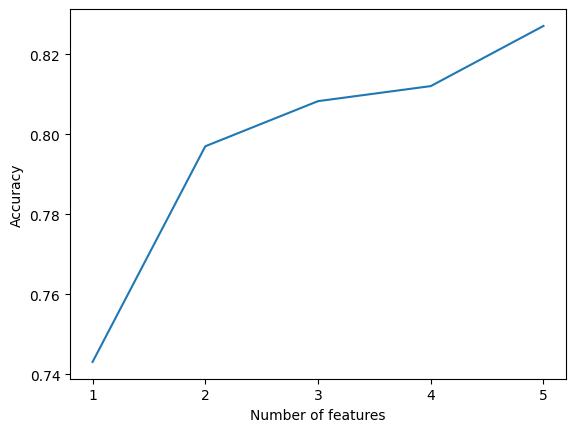

In [33]:
my_model = None
#! YOUR CODE STARTS HERE
my_model = KernelPerceptron(kernel=GaussianKernel(sigma=1.0), T=5)
#! YOUR CODE ENDS HERE
S, best_acc_list = greedy_forward(Xtrain, ytrain, my_model, k = 3)
print(f'The chosen features are: {feature_names[S]}')
n_features = len(S)
plt.figure()
plt.plot(np.arange(n_features) + 1, best_acc_list)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(n_features) + 1)
plt.show()

#### Evaluate the performance using the chosen set of features on the test set (1pt)

Use the same model configuration as above. Use the chosen features for training, and output the accuracy on the test set.

In [34]:

#! YOUR CODE STARTS HERE
Xtrain_selected = Xtrain[:, S]
Xtest_selected = Xtest[:, S]
my_model.fit(Xtrain_selected, ytrain)
ypred = my_model.predict(Xtest_selected)
accuracy = accuracy_score(ytest, ypred)
#! YOUR CODE ENDS HERE
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 79.50%


## Task 2C.2. L-1 SVM (10pts)

The second method for feature selection is the L1-SVM. The $L_1$ regularization provides an incentive for the weight vector to be sparse, i.e., using fewer features. For sake of simplicity, kernelized SVM will not be necessary here.

The loss function for the L1-SVM is

$$
    L = \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i \mathbf{w}^T \mathbf{x}_i) + \lambda \lVert w \rVert_1 
$$

where we have the hinge loss and a $L_1$ regularization term.


### Implementation of the L1-SVM loss and grad functions (8pts)

### L1-SVM Implementation Justification

**High-Level Approach:**
L1-SVM combines hinge loss with L1 regularization to encourage sparse solutions. The hinge loss is $\max(0, 1 - y_i \mathbf{w}^T \mathbf{x}_i)$ and its gradient is $-y_i \mathbf{x}_i$ when the margin is violated, 0 otherwise. The L1 penalty $\lambda ||\mathbf{w}||_1$ has subgradient $\lambda \cdot \text{sign}(\mathbf{w})$.

**Code Structure:**
- `l1_svm_loss_function`: Computes total loss (hinge + L1) and gradient
  - Calculate margins and identify violations
  - Compute hinge loss and its gradient
  - Add L1 regularization term and subgradient
- `gradient_descent_l1_svm`: Iteratively updates weights using gradient descent until convergence or max iterations

In [35]:
def l1_svm_loss_function(w, X, y, lambda_):
    """Loss and grad function for L1-SVM loss

    Args:
        w: weights
        X: features
        y: labels
        lambda_: regularization constant

    Returns:
        loss: the L1-SVM loss
        grad: the gradient of the loss wrt w, evaluated at the current w
    """
    #! YOUR CODE STARTS HERE
    n = len(y)
    margins = 1 - y * np.dot(X, w)
    hinge_loss = np.maximum(0, margins)
    loss = np.mean(hinge_loss) + lambda_ * np.sum(np.abs(w))
    
    grad = np.zeros_like(w)
    for i in range(n):
        if margins[i] > 0:
            grad += -y[i] * X[i]
    grad = grad / n + lambda_ * np.sign(w)
    #! YOUR CODE ENDS HERE
    return loss, grad

def gradient_descent_l1_svm(X, y, initial_w,  eta = 3e-4, tolerance = 1e-5, lambda_= 1, max_iter = 1000):
    """Perform gradient descent with the L1-SVM loss

    Args:
        X: features
        y : labels
        initial_w: initial weight
        eta: learning rate
        tolerance: convergence tolerance
        lambda_: regularization constant
        max_iter (int, optional): maximum number of gradient descent steps. Defaults to 1000.

    Returns:
        w: final weight
        loss_history: list of L1-SVM losses throughout gradient descent
    """
    loss_history = []
    prev_loss = np.inf
    w = initial_w
    #! YOUR CODE STARTS HERE
    for iteration in range(max_iter):
        loss, grad = l1_svm_loss_function(w, X, y, lambda_)
        loss_history.append(loss)
        
        if abs(prev_loss - loss) < tolerance:
            break
        
        w = w - eta * grad
        prev_loss = loss
    #! YOUR CODE ENDS HERE
    
    return w, loss_history

### Lambda cross validation (2pts)

The two cells below are intended to perform K-fold cross validation to select the best $\lambda$. You do not have to make any code modifications.

In [36]:
def cross_validation(Xtrain, ytrain, initial_w, eta, tolerance, lambda_, max_iter=1000, k = 10):
    m = len(ytrain)
    fold_size = m//k
    loss_list = []
    for i in range(k):
        tr_idx = list(range(i*fold_size)) + list(range((i+1) * fold_size, m))
        val_idx = list(range(i * fold_size, (i+1) * fold_size))
        Xtrain_fold = Xtrain[tr_idx]
        ytrain_fold = ytrain[tr_idx]
        Xval_fold = Xtrain[val_idx]
        yval_fold = ytrain[val_idx]        
        w, _ = gradient_descent_l1_svm(Xtrain_fold, ytrain_fold, initial_w, eta, tolerance, lambda_, max_iter)
        loss, _ = l1_svm_loss_function(w, Xval_fold, yval_fold, lambda_)
        loss_list.append(loss)
        
    return np.mean(loss_list)

Testing lambda_=np.float64(0.001)
Testing lambda_=np.float64(0.0021544346900318843)
Testing lambda_=np.float64(0.004641588833612777)
Testing lambda_=np.float64(0.01)
Testing lambda_=np.float64(0.021544346900318832)
Testing lambda_=np.float64(0.046415888336127774)
Testing lambda_=np.float64(0.1)
Testing lambda_=np.float64(0.21544346900318823)
Testing lambda_=np.float64(0.46415888336127775)
Testing lambda_=np.float64(1.0)
The best lambda is 0.001


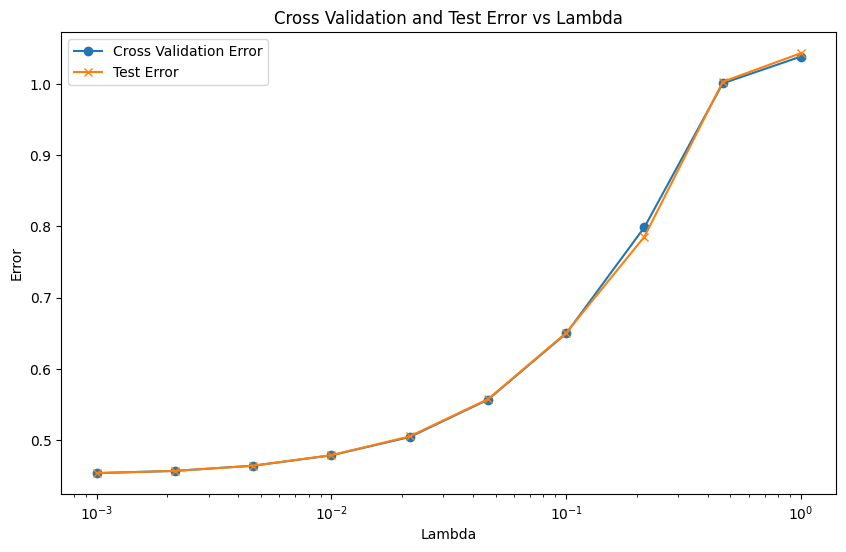

In [37]:
lambda_list = np.logspace(-3, 0, 10)

cv_errors = []
test_errors = []

initial_w = np.zeros(Xtrain.shape[1])
eta = 0.01
tolerance = 1e-4

w_list = []
for lambda_ in lambda_list:
    print(f'Testing {lambda_=}')
    w, _ = gradient_descent_l1_svm(Xtrain, ytrain, initial_w, eta, tolerance, lambda_)
    
    w_list.append(w)
    cv_error = cross_validation(Xtrain, ytrain, w, eta, tolerance, lambda_)
    cv_errors.append(cv_error)
    
    test_error, _ = l1_svm_loss_function(w, Xtest, ytest, lambda_)
    test_errors.append(test_error)

print(f'The best lambda is {lambda_list[np.argmin(cv_errors)]}')
plt.figure(figsize=(10, 6))
plt.plot(lambda_list, cv_errors, label='Cross Validation Error', marker='o')
plt.plot(lambda_list, test_errors, label='Test Error', marker='x')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()
plt.title('Cross Validation and Test Error vs Lambda')
plt.show()

#### Discussion Questions

1. Let's say our lambda list is fixed, and hyperparameters (such as k, num_iter, tolerance, etc.) are fixed. You don't have to take into consideration the plot above. Why might there be an issue with the lambda selection procedure above?
   
The procedure uses the training set weights as initialization for cross-validation, which creates data leakage between the training and validation folds. Specifically, the line `cv_error = cross_validation(Xtrain, ytrain, w, eta, tolerance, lambda_)` passes the weights `w` that were already trained on the full training set, meaning the cross-validation folds are evaluated using a model that has already seen all the training data. This violates the independence assumption of cross-validation and can lead to overly optimistic lambda selection that doesn't generalize well. The correct approach would be to initialize with `initial_w = np.zeros(Xtrain.shape[1])` for each cross-validation call rather than using pre-trained weights.